## **Observations and Insights**

- Mouse sex was very evenly distributed in this study, w/ 50.6% of mice being male compared to 49.4% being female.
- Tumor volume appears to be influenced by weight in mice treated w/ Capomulin. Heavier mice, in general, had larger tumors. The correlation coefficient for this relationship is ~0.84.
- Capomulin was very effective in reducing tumor volume in mouse 's185'. Tumor volume was decreased by ~50% over the span of 45 minutes.
- In this study, of the 4 most promising drugs based on tumor volume, Ramicane and Capomulin were, on average, more effective in reducing tumor volume than Infubinol and Ceftamin.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
#read in mouse data as a pandas dataframe
mouse_df = pd.read_csv('data/Mouse_metadata.csv')

In [58]:
#read in results data as a pandas dataframe
results_df = pd.read_csv('data/Study_results.csv')

In [59]:
#merge the dataframes on mouse ID
merged_df = mouse_df.merge(results_df, on=['Mouse ID', 'Mouse ID'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## **Summary Dataframe**

In [60]:
#groupby drug regimen and find the mean, median, variance, standard deviation, and standard error of the mean of tumor volume for each drug
summary_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var', 'std', 'sem'])

#rename columns
columns = [('Tumor Volume', 'mean'), ('Tumor Volume', 'median'), ('Tumor Volume', 'var'), ('Tumor Volume', 'std'), ('Tumor Volume', 'sem')]
summary_df.columns = pd.MultiIndex.from_tuples(columns, sortorder=1)
summary_df

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## **Bar Plot Using Pandas Plotting**

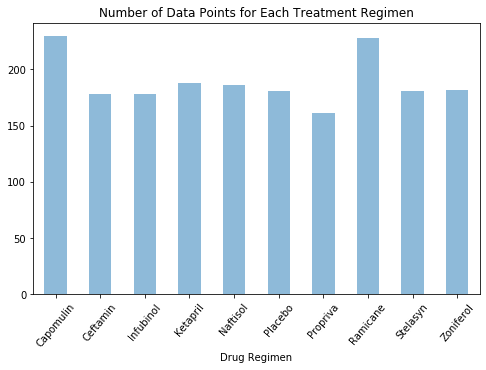

In [61]:
#groubpy drug regimen and count number of data points
treatment_counts = merged_df.groupby('Drug Regimen')['Drug Regimen'].count()

#plot bar chart using pandas plotting
treatment_counts.plot(kind='bar', rot=50, title='Number of Data Points for Each Treatment Regimen', alpha=0.5, figsize=(8,5), width=0.5);

## **Bar Plot Using Matplotlib Plotting**

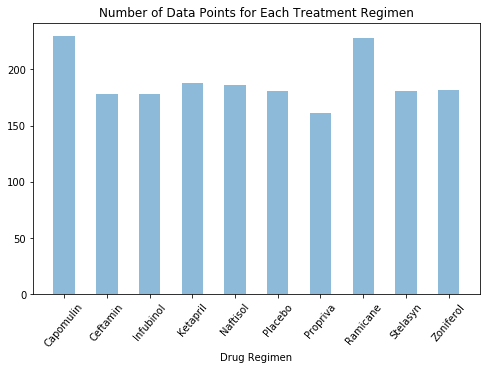

In [62]:
#initiate figure using matplotlib
fig, ax = plt.subplots(figsize=(8,5))

#add bar chart, use index values of treatment_counts as x-axis
ax.bar(treatment_counts.index, treatment_counts, alpha=0.5, width=0.5)

#set title
ax.set_title('Number of Data Points for Each Treatment Regimen')

#rotate x-axis labels
plt.xticks(rotation=50)

#set x-axis label
ax.set_xlabel('Drug Regimen');

## **Pie Chart Using Pandas Plotting**

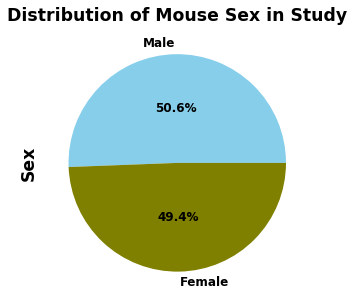

In [63]:
#isolate 'Sex' column and count the number of data points for each sex
sex_counts = merged_df['Sex'].value_counts()

#plot pie chart using pandas plotting
sex_pie_plot = sex_counts.plot(kind='pie', figsize=(8,5), pctdistance=.5, autopct='%1.1f%%', fontsize='large',textprops={'fontweight': 'bold'}, colors=['skyblue', 'olive'])

#customize y-axis label
sex_pie_plot.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')

#set title
sex_pie_plot.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

## **Pie Chart Using Matplotlib Plotting**

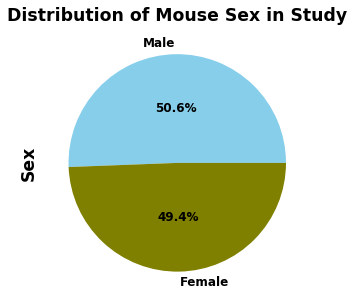

In [64]:
#initiate figure using matplotlib
fig, ax = plt.subplots(figsize=(8,5))

#add pie chart
ax.pie(sex_counts, labels=['Male', 'Female'], colors=['skyblue', 'olive'], pctdistance=.5, autopct='%1.1f%%',textprops={'fontweight': 'bold', 'fontsize': 'large'})

#customize y-axis label
ax.set_ylabel('Sex', fontsize='xx-large', fontweight='bold')

#set title
ax.set_title('Distribution of Mouse Sex in Study', fontsize='xx-large', fontweight='bold');

## **Quartile, IQR, and Outlier Analysis**

In [65]:
#subset dataframe to 4 most promising drug treatments
df_most_promising = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#return final tumor volume for each mouse in most promising df
final_tumor_volume_df = df_most_promising.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID', 'Drug Regimen']).set_index('Mouse ID')

#group final tumor volume df by drug regimen and return lower quartile, median, and upper quartile of tumor volume
tumor_volume_quartiles_per_drug = final_tumor_volume_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25, .5, .75])

#display quartiles as a df, add IQR and lower/upper outlier boundaries
quartiles_df = pd.DataFrame(tumor_volume_quartiles_per_drug).unstack(level=-1)
quartiles_df.columns = ['Lower Q', 'Median', 'Upper Q']
quartiles_df['IQR'] = quartiles_df['Upper Q'] - quartiles_df['Lower Q']
quartiles_df['Lower Outlier Boundary'] = quartiles_df['Lower Q'] - (1.5 * quartiles_df['IQR'])
quartiles_df['Upper Outlier Boundary'] = quartiles_df['Upper Q'] + (1.5 * quartiles_df['IQR'])
quartiles_df

,Lower Q,Median,Upper Q,IQR,Lower Outlier Boundary,Upper Outlier Boundary
Drug Regimen,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811


In [66]:
#assign unique drug regimens to a list
drug_regimens = df_most_promising['Drug Regimen'].unique()

#initiate empty list to hold tumor volumes
volume_list = []

#loop through drug regimens and return tumor volumes for each regimen, append each list to volume_list
for regimen in drug_regimens:
    volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    volume_list.append(volumes)
    
#assign each volume list to a new variable according to the drug name
ramicane_volumes = volume_list[0]
capomulin_volumes = volume_list[1]
infubinol_volumes = volume_list[2]
ceftamin_volumes = volume_list[3]


#find outliers for each drug based based on whether they are outside the lower/upper outlier boundaries
ramicane_lower_outliers = [volume for volume in ramicane_volumes if volume < quartiles_df.loc['Ramicane','Lower Outlier Boundary']]
ramicane_upper_outliers = [volume for volume in ramicane_volumes if volume > quartiles_df.loc['Ramicane','Upper Outlier Boundary']]
ramicane_outliers = ramicane_lower_outliers + ramicane_upper_outliers

capomulin_lower_outliers = [volume for volume in capomulin_volumes if volume < quartiles_df.loc['Capomulin','Lower Outlier Boundary']]
capomulin_upper_outliers = [volume for volume in capomulin_volumes if volume > quartiles_df.loc['Capomulin','Upper Outlier Boundary']]
capomulin_outliers = capomulin_lower_outliers + capomulin_upper_outliers

infubinol_lower_outliers = [volume for volume in infubinol_volumes if volume < quartiles_df.loc['Infubinol','Lower Outlier Boundary']]
infubinol_upper_outliers = [volume for volume in infubinol_volumes if volume > quartiles_df.loc['Infubinol','Upper Outlier Boundary']]
infubinol_outliers = infubinol_lower_outliers + infubinol_upper_outliers

ceftamin_lower_outliers = [volume for volume in ceftamin_volumes if volume < quartiles_df.loc['Ceftamin','Lower Outlier Boundary']]
ceftamin_upper_outliers = [volume for volume in ceftamin_volumes if volume > quartiles_df.loc['Ceftamin','Upper Outlier Boundary']]
ceftamin_outliers = ceftamin_lower_outliers + ceftamin_upper_outliers

#print outliers
print(f"The potential outliers for Ramicane are: {ramicane_outliers}" if ramicane_outliers != [] else f"The potential outliers for Ramicane are: None")
print(f"The potential outliers for Capomulin are: {capomulin_outliers}" if capomulin_outliers != [] else f"The potential outliers for Capomulin are: None")
print(f"The potential outliers for Infubinol are: {infubinol_outliers}" if infubinol_outliers != [] else f"The potential outliers for Infubinol are: None")
print(f"The potential outliers for Ceftamin are: {ceftamin_outliers}" if ceftamin_outliers != [] else f"The potential outliers for Ceftamin are: None")

The potential outliers for Ramicane are: None
The potential outliers for Capomulin are: None
The potential outliers for Infubinol are: [36.321345799999996]
The potential outliers for Ceftamin are: None


## **Box and Whisker Plots for 4 Most Promising Drugs**

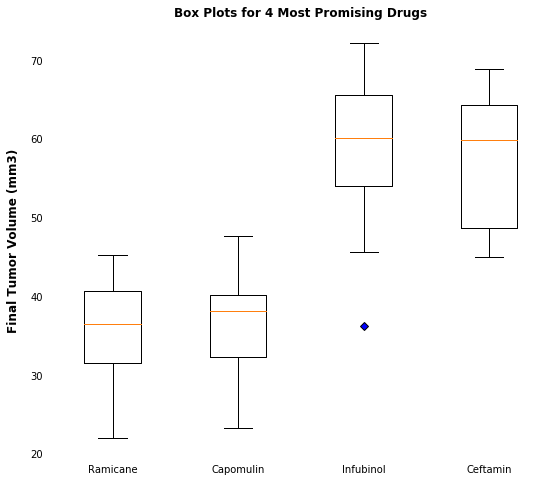

In [67]:
#dictionary to hold parameters for outlier markers
blue_diamond=dict(markerfacecolor='b', marker='D')

#initiate plot w/ matplotlib
fig, ax = plt.subplots(figsize=(9,8))

#add boxplot to ax
ax.boxplot(volume_list, labels=drug_regimens, flierprops=blue_diamond)

#customize title
ax.set_title('Box Plots for 4 Most Promising Drugs', fontweight='bold')

#turn off ticks
ax.tick_params(bottom=False, left=False)

#customize y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)', labelpad=10, fontweight='bold', fontsize='large')

#turn off frame
ax.set_frame_on(False);

## **Line Plot of Time vs Tumor Volume for a Single Mouse Treated with Capomulin**

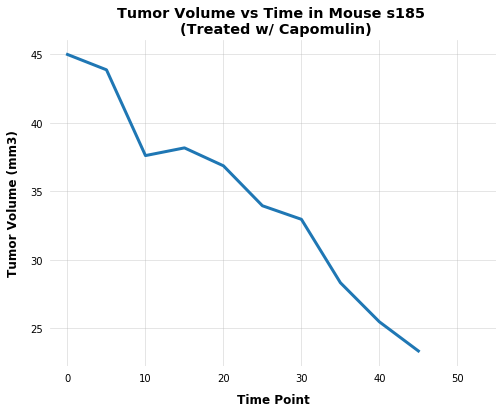

In [68]:
#isolate data for a single mouse
s185_capomulin_df = df_most_promising[(df_most_promising['Drug Regimen'] == 'Capomulin') & (df_most_promising['Mouse ID'] == 's185')]

#initiate plot w/ matplotlib
fig, ax = plt.subplots(figsize=(8,6))

#add line plot
ax.plot(s185_capomulin_df['Timepoint'], s185_capomulin_df['Tumor Volume (mm3)'], lw=3)

#customize x-axis label
ax.set_xlabel('Time Point', labelpad=10, fontweight='bold', fontsize='large')

#customize y-axis label
ax.set_ylabel('Tumor Volume (mm3)', labelpad=10, fontweight='bold', fontsize='large')

#set title
ax.set_title('Tumor Volume vs Time in Mouse s185 \n (Treated w/ Capomulin)', fontweight='bold', fontsize='x-large')

#turn off ticks
ax.tick_params(bottom=False, left=False)

#turn off frame
ax.set_frame_on(False)

#adjust x-axis range
ax.set_xlim(right=55)

#turn off grid
ax.grid(True, alpha=0.4)

## **Scatter Plot of Mouse Weight vs Average Tumor Volume for the Capomulin Treatment Regimen**

C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


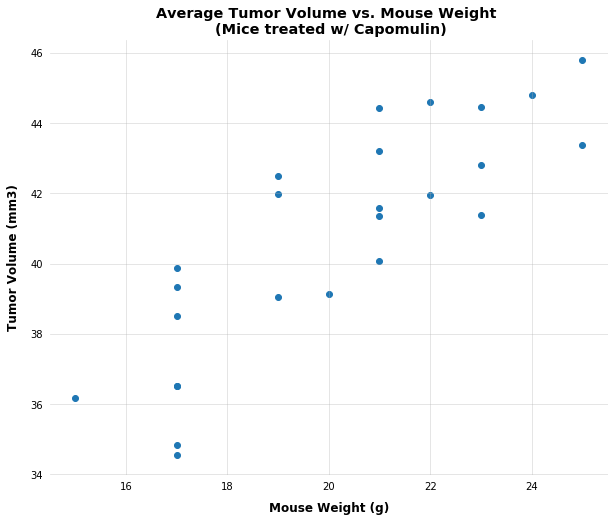

In [69]:
#subset df to only mice treated w/ capomulin
capomulin_df = df_most_promising[df_most_promising['Drug Regimen'] == 'Capomulin']

#groupby mouse and find average of tumor volume
weight_volume_capomulin_grouped_by_mouse_df = capomulin_df.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean()

#initiate plot w/ matplotlib
fig, ax = plt.subplots(figsize=(10,8))

#add scatter plot to ax
ax.scatter(x=weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], y=weight_volume_capomulin_grouped_by_mouse_df['Tumor Volume (mm3)'])

#set title
ax.set_title('Average Tumor Volume vs. Mouse Weight \n (Mice treated w/ Capomulin)', fontweight='bold', fontsize='x-large')

#customize x-axis label
ax.set_xlabel('Mouse Weight (g)', fontsize='large', fontweight='bold', labelpad=10)

#customize y-axis label
ax.set_ylabel('Tumor Volume (mm3)', fontsize='large', fontweight='bold', labelpad=10)

#turn off frame
ax.set_frame_on(False)

#turn off ticks
ax.tick_params(bottom=False, left=False)

#turn off grid
ax.grid(True, alpha=0.4)

#ax.plot(weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], line, 'r', zorder=0)
#ax.text(19,37, s=f"{round(linreg.slope,3)}x+{round(linreg.intercept,3)}", fontsize=13)
#ax.annotate(s=f"{round(linreg.slope,3)}x+{round(linreg.intercept,3)}", xy=(18,38.7), xytext=(18.5,37), arrowprops=dict(width=3, color='k'), fontsize=13, fontweight='bold');

## **Correlation and Regression**

In [70]:
#linear regression of mouse weight vs tumor volume
linreg = stats.linregress(weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], weight_volume_capomulin_grouped_by_mouse_df['Tumor Volume (mm3)'])

#assign correlation coefficient from linreg to a variable
corr_coeff = linreg.rvalue

#use y = mx+b to create a line, with m=slope from linreg, x=weight, and b=intercept from linreg
line = linreg.slope * weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'] + linreg.intercept

#return correlation coefficient 
corr_coeff

0.8419363424694718

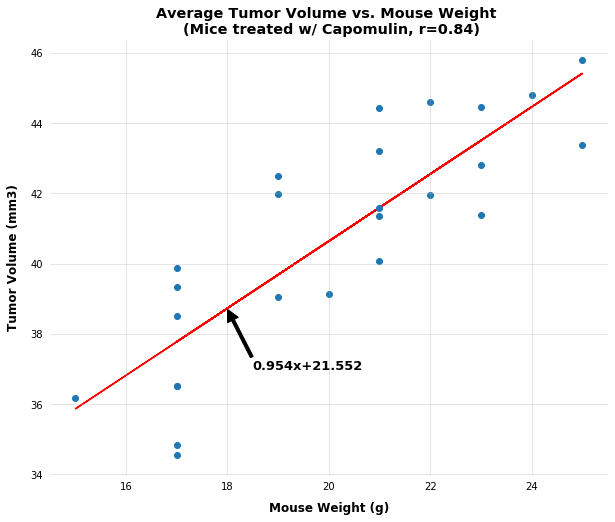

In [71]:
#recreate identical chart above
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], y=weight_volume_capomulin_grouped_by_mouse_df['Tumor Volume (mm3)'])
ax.set_title(f"Average Tumor Volume vs. Mouse Weight \n (Mice treated w/ Capomulin, r={round(corr_coeff,2)})", fontweight='bold', fontsize='x-large')
ax.set_xlabel('Mouse Weight (g)', fontsize='large', fontweight='bold', labelpad=10)
ax.set_ylabel('Tumor Volume (mm3)', fontsize='large', fontweight='bold', labelpad=10)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
ax.grid(True, alpha=0.4)

#add linear regression line
ax.plot(weight_volume_capomulin_grouped_by_mouse_df['Weight (g)'], line, 'r', zorder=0)

#annotate the linear regression line w/ an arrow and the equation
ax.annotate(s=f"{round(linreg.slope,3)}x+{round(linreg.intercept,3)}", xy=(18,38.7), xytext=(18.5,37), arrowprops=dict(width=3, color='k'), fontsize=13, fontweight='bold');